# AMl 3104 Decision Tree Assignment
Student Name: Miraj Sinya

Student ID: c0863371

Github repo link: https://github.com/MirajSin/Neural-Network-And-Deep-Learning

**Q1. Describe the decision tree classifier algorithm and how it works to make predictions.**

A decision tree is a hierarchical structure that resembles an inverted tree, with a single root node at the top and various internal nodes and leaf nodes where each node represents a decision or a test on a feature in the dataset. The decision tree classifier algorithm works by recursively splitting the data into subsets based on feature values and thresholds, leading to a leaf node that provides the prediction.

The algorithm selects features and thresholds to split the data at each internal node in a way that minimizes impurity or error, such as Gini impurity (for classification) or mean squared error (for regression). This process continues recursively until a stopping condition is met, such as a maximum tree depth or a minimum number of data points in a leaf node. Decision tree classifier works on making predictions by:

1. Node Splitting:

At each internal node, the algorithm selects a feature from the dataset and a corresponding threshold value. This feature and threshold are chosen to split the data into two or more subsets in such a way that they maximize the separation between different classes in the target variable (for classification tasks) or minimize the variance (for regression tasks).

2. Decision Making:

When a new data point needs to be classified or predicted, it is passed down the tree starting from the root node. At each internal node, the algorithm compares the feature value of the data point with the threshold. Depending on the outcome, the algorithm follows the corresponding branch of the tree to the next internal node. This process continues until a leaf node is reached.

3. Leaf Nodes and Predictions:

Each leaf node in the decision tree represents a class label (in classification) or a numerical value (in regression). When the algorithm reaches a leaf node, it assigns the class label or the numerical value associated with that leaf node as the prediction for the input data point.

4. Pruning:

Decision trees can be prone to overfitting, where they capture noise in the training data. Pruning is a technique used to reduce the complexity of the tree by removing some branches, which can improve the tree's generalization performance on unseen data.

In [33]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


**Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.**

Decision tree classification is a mathematical process that involves measuring impurity, selecting the best features and thresholds to split the data, and building a tree structure to make predictions. The choice of features and thresholds is guided by criteria such as Gini impurity and information gain, which aim to reduce impurity and create informative splits in the data. The mathemaatical intuition behind the decision tree classification can be explained with the following concepts:

1. Impurity Measure:

At the heart of decision tree classification is the concept of impurity. Impurity is a measure of how mixed the class labels are in a subset of data. Common impurity measures include Gini impurity and entropy.
  
  1.1. Gini Impurity:

Gini impurity measures the probability of misclassifying a randomly chosen element from the dataset. It is mathematically defined as:
Gini Impurity = 1 - Σ (p_i)^2

where p_i is the proportion of instances belonging to class i in the subset.

A Gini impurity of 0 indicates that all elements in the subset belong to the same class, while an impurity of 0.5 indicates a perfectly mixed dataset with equal representation of all classes.

  1.2. Entropy:

Entropy measures the level of disorder or uncertainty in a dataset. It is defined as:
Entropy = - Σ p_i * log2(p_i)

Similar to Gini impurity, entropy is 0 when the data is pure (all elements belong to the same class) and higher when the data is mixed.

2. Splitting Criteria:

The goal of a decision tree is to create splits in the data that minimize impurity. This means finding a feature and a threshold value that separates the data into subsets with the least impurity.

3. Information Gain:

Information gain is a measure of how much the impurity in a dataset is reduced after a particular split. It is calculated as the impurity of the parent node minus the weighted average impurity of the child nodes after the split. The feature and threshold that result in the highest information gain are chosen for the split.

In [24]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data
Y = data.target

# Function to calculate Gini impurity
def gini_impurity(labels):
    total_samples = len(labels)
    if total_samples == 0:
        return 0

    unique_classes = np.unique(labels)
    gini = 1

    for c in unique_classes:
        p_c = np.sum(labels == c) / total_samples
        gini -= p_c ** 2

    return gini

# Calculate Gini impurity for the entire dataset
gini_initial = gini_impurity(Y)

print(f"Initial Gini Impurity: {gini_initial:.2f}")

# Function to calculate entropy
def entropy(labels):
    total_samples = len(labels)
    if total_samples == 0:
        return 0

    entropy_value = 0
    unique_classes = np.unique(labels)

    for c in unique_classes:
        p_c = np.sum(labels == c) / total_samples
        if p_c > 0:
            entropy_value -= p_c * np.log2(p_c)

    return entropy_value

# Calculate entropy for the entire dataset
entropy_initial = entropy(Y)

print(f"Initial Entropy: {entropy_initial:.2f}")

# Splitting the dataset into two subsets based on a selected feature and threshold
feature_index = 3  # Example feature index (petal width in this case)
threshold = 1.0  # Example threshold

left_subset_indices = [i for i, x in enumerate(X[:, feature_index]) if x < threshold]
right_subset_indices = [i for i, x in enumerate(X[:, feature_index]) if x >= threshold]

# Calculate Gini impurity and entropy for the left subset
left_Y = Y[left_subset_indices]
gini_left = gini_impurity(left_Y)
entropy_left = entropy(left_Y)

# Calculate Gini impurity and entropy for the right subset
right_Y = Y[right_subset_indices]
gini_right = gini_impurity(right_Y)
entropy_right = entropy(right_Y)

# Calculate the weighted average of Gini impurity and entropy after the split
total_samples = len(Y)
weighted_gini = (len(left_Y) / total_samples) * gini_left + (len(right_Y) / total_samples) * gini_right
weighted_entropy = (len(left_Y) / total_samples) * entropy_left + (len(right_Y) / total_samples) * entropy_right

# Calculate information gain
information_gain_gini = gini_initial - weighted_gini
information_gain_entropy = entropy_initial - weighted_entropy

print(f"Gini Impurity after Split: {weighted_gini:.2f}")
print(f"Information Gain (Gini): {information_gain_gini:.2f}")

print(f"Entropy after Split: {weighted_entropy:.2f}")
print(f"Information Gain (Entropy): {information_gain_entropy:.2f}")


Initial Gini Impurity: 0.67
Initial Entropy: 1.58
Gini Impurity after Split: 0.33
Information Gain (Gini): 0.33
Entropy after Split: 0.67
Information Gain (Entropy): 0.92


The information gain numbers show that there is significant reduction in entrophy with a values of 0.92 after the split than compared to gini impurity with a value of 0.33.

**Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.**


A decision tree classifier can be used to solve a binary classification problem, where the goal is to classify data into one of two classes. Decision tree classifier for binary classification involves selecting features, building the tree by splitting the data to minimize impurity, making predictions by traversing the tree, and evaluating the model's performance.  Solving binary classification problem using decision tree classifer involves the following steps:

1. Data Preparation:

Start with a dataset that is labeled with two classes, typically denoted as Class A and Class B. Each data point in the dataset should have features (attributes) and a corresponding class label.
2. Feature Selection:

Choose the features from the dataset that will be used to make the classification decision. The selection of features is critical because it influences the effectiveness of the decision tree.
3. Building the Decision Tree:

The process of building the decision tree involves selecting the best features and thresholds to split the data into subsets that minimize impurity (e.g., Gini impurity or entropy). The following steps are involved:

3.1. Calculate the impurity of the entire dataset based on the class labels. This is the impurity of the root node.

3.2. For each feature, calculate the information gain (or Gini gain) by splitting the data based on that feature's values. Information gain is the difference between the impurity of the current node and the weighted average impurity of the child nodes after the split.

3.3. Choose the feature that maximizes information gain or minimizes impurity and select the corresponding threshold value for the split.

3.4. Split the data into two subsets based on the selected feature and threshold, creating two child nodes.

3.5. Repeat the process recursively for each child node, choosing the best feature and threshold for further splits.

3.6. Continue this process until a stopping condition is met, such as reaching a maximum tree depth or having a minimum number of data points in a leaf node.

4. Prediction:

To make predictions for new, unseen data points, we traverse the decision tree. Starting from the root node, you compare the feature values of the data point with the threshold values at each internal node and follow the appropriate branch until a leaf node is reached.

The class label associated with the reached leaf node is the prediction for the binary classification problem. For example, if the leaf node corresponds to Class A, we predict that the data point belongs to Class A; otherwise, we predict Class B.

5. Evaluation:

After building the decision tree and making predictions on a test dataset, we evaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1 score, and the area under the ROC curve (AUC), depending on your problem and objectives.


In [31]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
df = load_iris()

data = pd.DataFrame(df.data, columns = df.feature_names)
data['target'] = df.target
final_data = data[data['target']!=2] #Creting a binary problem from the iris dataset with the exclusion of class 2 from the targets

#Train test split to train the model
X = final_data.drop('target', axis = 1)
y = final_data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make
predictions.**


The geometric intuition behind decision tree classification is closely related to the idea of partitioning the feature space into regions, with each region corresponding to a particular class. Decision tree classification aims to find a set of rules (splits) in feature space that best separates the different classes, creating these partitions.

The geometric intuition behind decision tree classification is that it divides the feature space into regions using decision boundaries (hyperplanes) defined by features and thresholds. These regions correspond to different classes, and predictions are made by assigning data points to the region in which they fall. This approach provides an intuitive way to understand how a decision tree algorithm works and why it makes certain predictions based on the input feature values. Makng predictions using geometric intuition involves:

1. Feature Space Partitioning:

Imagine the feature space as a multi-dimensional space where each axis represents a feature or attribute of the data. In binary classification, there are two classes, typically Class A and Class B. The goal is to divide this feature space into regions or subspaces such that each region is predominantly associated with one of the two classes.
2. Decision Boundaries:

Decision tree classification identifies decision boundaries in the feature space. These decision boundaries are typically orthogonal to the feature axes (for simplicity), but they can be oblique as well. Each decision boundary is associated with a node in the tree, and it separates data points belonging to different classes.
3. Splitting Nodes:

When building a decision tree, we choose features and thresholds for splitting nodes. The selected feature corresponds to one of the feature axes, and the threshold corresponds to a position along that axis.
4. Geometric Split:

Consider a single split in the decision tree. It is like drawing a hyperplane (in the case of 2D, it's just a line) across the feature space that partitions the data. If the feature values of a data point fall on one side of the hyperplane, it is assigned to one class; if on the other side, it is assigned to the other class.
5. Recursive Partitioning:

The process is repeated recursively for each child node, creating a hierarchical structure that further divides the feature space. Each split or node in the tree results in a new hyperplane, further refining the partitioning.
6. Making Predictions:

To make predictions for a new data point, we start at the root node of the tree and traverse the tree. At each internal node, we compare the feature values of the data point with the threshold of that node.

Depending on the outcome of the comparison, we move to the left or right child node, following the appropriate branch. This process continues until a leaf node is reached, which represents the region in the feature space where the data point belongs.

The class label associated with that leaf node is the prediction for the data point. If we are performing binary classification, we will assign it to Class A or Class B based on the class label of the leaf node.

7. Visualizing Decision Trees:
 We can visualize decision trees in 2D by drawing the decision boundaries as lines, and in higher dimensions as hyperplanes. These visualizations help us understand how the feature space is partitioned and why specific predictions are made.



**Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a
classification model.**


A confusion matrix is a table used in the field of machine learning and statistics to evaluate the performance of a classification model. It provides a clear and comprehensive summary of the model's predictions compared to the actual ground truth, that helps understand the model's accuracy, precision, recall, and other performance metrics. A confusion matrix is typically used in binary classification, where there are two classes, but it can be adapted for multi-class classification as well. It is often used in the context of evaluating the performance of classification models such as decision trees, support vector machines, logistic regression, and more.

A standard confusion matrix consists of four main components:

- True Positives (TP): The number of instances that were correctly predicted as positive (belonging to the positive class).

- True Negatives (TN): The number of instances that were correctly predicted as negative (belonging to the negative class).

- False Positives (FP): The number of instances that were incorrectly predicted as positive when they were actually negative. This is also known as a Type I error.

- False Negatives (FN): The number of instances that were incorrectly predicted as negative when they were actually positive. This is also known as a Type II error.

The confusion matrix can be use to calculate the following metrices to evaluate the performance of a classification model:
1. Accuracy:

Accuracy is a common performance metric and is calculated as (TP + TN) / (TP + TN + FP + FN). It measures the overall correctness of predictions and is the ratio of correctly classified instances to the total number of instances.
2. Precision (Positive Predictive Value):

Precision is calculated as TP / (TP + FP). It measures the proportion of true positive predictions among all positive predictions that shows how many of the predicted positive instances were actually positive.
3. Recall (Sensitivity or True Positive Rate):

Recall is calculated as TP / (TP + FN). It measures the ability of the model to correctly identify all actual positive instances that tells how many of the actual positive instances were correctly predicted.
4. Specificity (True Negative Rate):

Specificity is calculated as TN / (TN + FP). It measures the ability of the model to correctly identify all actual negative instances.
5. F1 Score:

The F1 Score is the harmonic mean of precision and recall and is calculated as 2 * (Precision * Recall) / (Precision + Recall). It provides a balance between precision and recall.
6. Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):

The ROC curve is a graphical representation of the model's performance across different thresholds. The AUC measures the area under the ROC curve, which quantifies the model's ability to distinguish between the positive and negative classes.
7. Evaluation of Class Imbalance:

In cases where the classes are imbalanced (one class has significantly more instances than the other), the confusion matrix helps understand if the model is biased toward the majority class. It's important to consider precision and recall for each class in such scenarios.


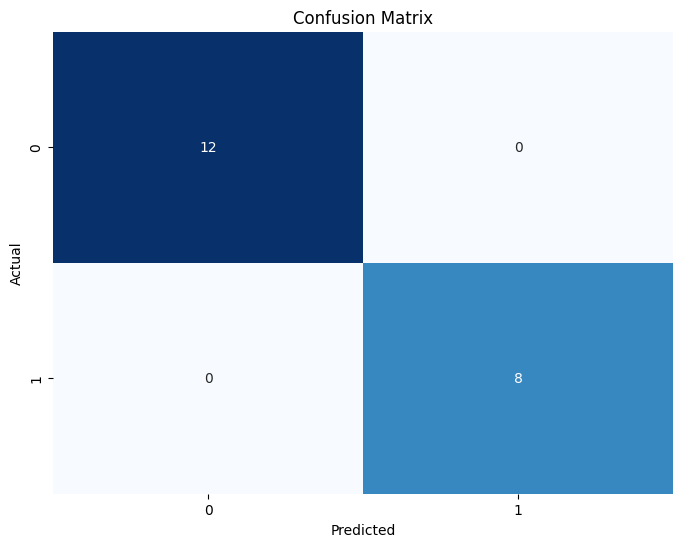

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

AUC-ROC Score: 1.00


In [39]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
df = load_iris()

data = pd.DataFrame(df.data, columns = df.feature_names)
data['target'] = df.target
final_data = data[data['target']!=2] #Creting a binary problem from the iris dataset with the exclusion of class 2 from the targets

#Train test split to train the model
X = final_data.drop('target', axis = 1)
y = final_data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Calculate AUC-ROC
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class
auc_roc = roc_auc_score(y_test, y_prob)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print(f"AUC-ROC Score: {auc_roc:.2f}")

**Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be
calculated from it.**


 |                 | Actual Positive | Actual Negative |
  |-----------------|-----------------|-----------------|
  | Predicted Positive |85            | 15            |
  | Predicted Negative | 10            | 90            |

In this confusion matrix:

Actual Positive (AP) represents the number of individuals who actually have the disease.
Actual Negative (AN) represents the number of individuals who do not have the disease.
Predicted Positive (PP) represents the number of individuals predicted to have the disease.
Predicted Negative (PN) represents the number of individuals predicted not to have the disease.
Now, let's calculate precision, recall, and F1 score using these values:

1. Precision:

Precision is the proportion of true positive predictions among all positive predictions. It is calculated as:

Precision = TP / (TP + FP) = 85 / (85 + 15) = 85 / 100 = 0.85
So, the precision is 0.85, meaning that 85% of the predicted positive cases were correct.

2. Recall:

Recall is the proportion of true positive predictions among all actual positive instances. It is calculated as:

Recall = TP / (TP + FN) = 85 / (85 + 10) = 85 / 95 ≈ 0.8947
So, the recall is approximately 0.8947, meaning that the model can correctly identify about 89.47% of the actual positive cases.

3. F1 Score:

The F1 score is the harmonic mean of precision and recall and provides a balance between these two metrics. It is calculated as:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
         = 2 * (0.85 * 0.8947) / (0.85 + 0.8947)
         ≈ 0.8725
The F1 score is approximately 0.8725, representing a balance between precision and recall. It indicates the overall performance of the model in terms of both false positives and false negatives.



**Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and
explain how this can be done.**


Choosing an appropriate evaluation metric for a classification problem is crucial because it directly impacts how we assess the performance of our model and make informed decisions. Different evaluation metrics highlight different aspects of a model's performance, and the choice of metric should align with our specific problem, goals, and the relative costs associated with different types of errors. Some of the reasons why choosing an appropriate evaluation metric for classification problem are:

1. Understanding the Problem:

Different classification problems have different requirements. For example, in a medical diagnosis task, we might want to minimize false negatives (missing a disease diagnosis), while in a spam email detection task, we may be more concerned about false positives (marking a legitimate email as spam). The choice of metric should align with these considerations.
2. Balancing Trade-offs:

Metrics like precision, recall, and the F1 score provide a balance between different types of errors. Precision is concerned with minimizing false positives, while recall focuses on minimizing false negatives. The F1 score combines these two aspects. Depending on the importance of each error type, we can choose the metric that best reflects our priorities.
3. Imbalanced Data:

In cases where one class significantly outnumbers the other (class imbalance), accuracy may not be an appropriate metric because it can be misleading. Metrics like precision, recall, or the area under the ROC curve (AUC) may be more appropriate to provide a more accurate representation of the model's performance.

4. Model Interpretability:

Some metrics are more interpretable and can provide insights into the model's behavior. For example, the confusion matrix allows us to see how well the model performs in different categories, which can help identify areas for improvement.
5. Comparative Analysis:

When comparing multiple models or approaches, having a consistent evaluation metric is essential. It allows us to assess which model performs better for your specific problem.

Choosing the appropriate evaluation metric is essential for assessing the performance of a classification model in a way that aligns with the problem's specific requirements and constraints. It involves a thoughtful analysis of the problem, the relative importance of different errors, and the impact of the model's predictions.There are certain ways we can choose an evlauation metric. Some of which are:

1. Understand the Problem and Objectives: First, understanding the nature of the classification problem and the specific goals and constraints is important taking into consideration the business context and the consequences of different types of errors.

2. Consult Domain Experts: Collaborate with domain experts or stakeholders to gain insights into the relative importance of true positives, true negatives, false positives, and false negatives in your application.

3. Use Multiple Metrics: It's often a good practice to report multiple metrics, including accuracy, precision, recall, F1 score, and AUC. This provides a more comprehensive view of your model's performance.

4. Adjust Thresholds: In some cases, the classification threshold can be adjusted to achieve a better balance between precision and recall. By changing the threshold, we can control the trade-off between different error types.

5. Iterate and Refine: Continuously monitoring and evaluating the model's performance as we gather more data and adapt to changing conditions. and making adjustments to our choice of evaluation metric as needed.



**Q8. Provide an example of a classification problem where precision is the most important metric, and
explain why.**


Credit card fraud detection is a good example of a classification problem where precision is the most importatnt metric.In credit card fraud detection, the goal is to identify and prevent fraudulent credit card transactions. It's crucial to catch as many fraudulent transactions as possible (high recall) while minimizing false alarms (high precision).

Precision is important in this scenario because making a false positive prediction, i.e., incorrectly flagging a legitimate transaction as fraudulent, can have significant consequences. Here's why precision matters the most in this case:

1. Fraud Detection Capabilities: If the system triggers false alarms frequently, it may lead to complacency in the fraud detection team. They might start ignoring alerts, assuming they are likely to be false positives, which could result in more fraudulent transactions going undetected.

2. Customer Experience: False positives can result in legitimate transactions being declined. This can be highly frustrating for customers and may lead to a poor user experience. It might even lead to customers changing their payment methods or abandoning the service.

3. Reputation and Trust: False positives can erode trust between the bank or credit card company and its customers. Repeated false alarms can lead customers to believe that the institution is not safeguarding their interests effectively.

4. Operational Costs: Investigating and resolving false positives can be costly for the credit card company. It consumes resources, time, and effort, which could be better spent elsewhere.


**Q9. Provide an example of a classification problem where recall is the most important metric and explain
why.**

For a classification problem where recall is the most important metric, cancer detection can be a good examle. In early cancer detection, the goal is to identify individuals who might have cancer at an early stage. The focus is on maximizing the detection of true positive cases (high recall) while minimizing the risk of missing actual cancer cases (low false negatives).Here are some reacons why recall is the most important metric in this case:

1. Reducing False Negatives: False negatives, where the model fails to detect actual cancer cases, can lead to severe consequences, both for the individual's health and for healthcare providers.

2. Early Intervention: Detecting cancer at an early stage significantly improves the chances of successful treatment and recovery. Missing a cancer case (false negative) could delay diagnosis, resulting in more advanced and less treatable stages of the disease. Therefore, the primary concern is capturing as many true positives as possible to enable early intervention.

3. Diagnostic Sensitivity: Recall in the context of healthcare is often referred to as "sensitivity." A highly sensitive test ensures that it detects as many true positive cases as possible, making it a crucial measure for medical screening and early disease detection.
